In [1]:
"""
Play the RF mapping for one unit.

Tony Fu, July 8, 2022
"""
import sys

import numpy as np
from torchvision import models
from torchvision.models import AlexNet_Weights, VGG16_Weights
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl

sys.path.append('..')
from image import make_box
from mapping import BarRfMapperPz
import constants as c

In [ ]:
conv_i = 1
unit_i = 11

import numpy as np
model = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
bm = BarRfMapperPz(model, conv_i, (227, 227))
a = bm.animate(unit_i)

fig, ax = plt.subplots()
im = ax.imshow(np.zeros((227, 227)), cmap='gray')
    
def animate_func(frame):
    vmin = im.get_array().min()
    vmax = im.get_array().max() * 0.8
    im.set_data(frame[0])
    im.set_clim(vmin=vmin, vmax=vmax)
    ax.set_title(f"conv{conv_i+1} unit no.{unit_i} frame {frame[2]}, response = {frame[1]:.2f}")

ani = animation.FuncAnimation(
    fig, animate_func, frames=a, interval=10, save_count=0, cache_frame_data=False, repeat=False)

ax.add_patch(make_box(bm.box))
boundary = 10
plt.xlim([bm.box[1] - boundary, bm.box[3] + boundary])
plt.ylim([bm.box[0] - boundary, bm.box[2] + boundary])
ax.invert_yaxis()
plt.show()

The RF mapper is for Conv2 (not Conv1) with input shape (yn = 227, xn = 227).


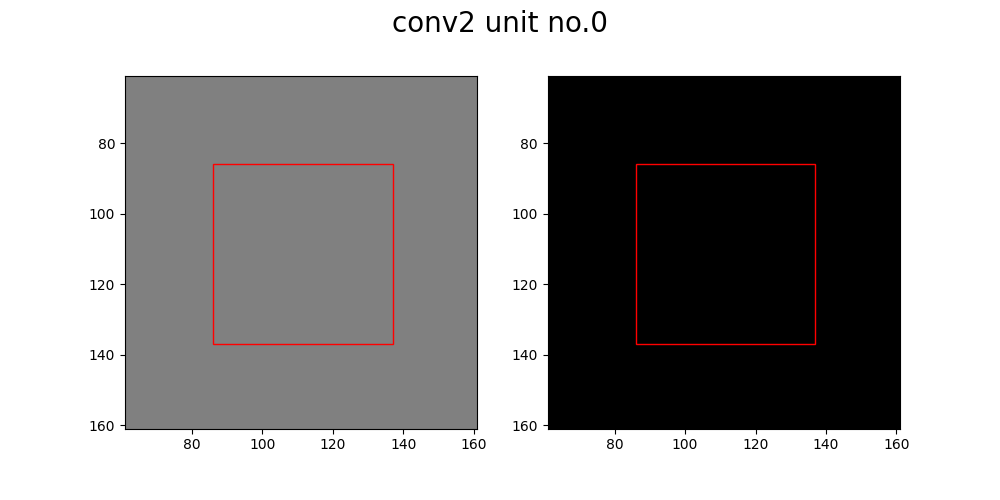

In [2]:
conv_i = 1
unit_i = 0

model = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
bm = BarRfMapperPz(model, conv_i, (227, 227))
a = bm.animate(unit_i)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f"conv{conv_i+1} unit no.{unit_i}", fontsize=20)
fig.set_size_inches(10, 5)
fig.suptitle(f"conv{conv_i+1} unit no.{unit_i}", fontsize=20)
ax1.clear()
ax2.clear()
im1 = ax1.imshow(np.zeros((227, 227)), cmap='gray', vmin=-1, vmax=1)
im2 = ax2.imshow(np.zeros((227, 227)), cmap='gray')
    
def animate_func(frame):
    im1.set_data(frame[3])
    ax1.set_title(f"response = {frame[1]:.2f}")

    vmin = im2.get_array().min()
    vmax = im2.get_array().max()
    im2.set_data(frame[0])
    im2.set_clim(vmin=vmin, vmax=vmax)
    ax2.set_title(f"frame {frame[2]}")

ani = animation.FuncAnimation(
    fig, animate_func, frames=a, interval=10, save_count=0, cache_frame_data=False, repeat=False)

ax1.add_patch(make_box(bm.box))
ax2.add_patch(make_box(bm.box))
boundary = bm.rf_size//2
ax1.set_xlim([bm.box[1] - boundary, bm.box[3] + boundary])
ax1.set_ylim([bm.box[0] - boundary, bm.box[2] + boundary])
ax2.set_xlim([bm.box[1] - boundary, bm.box[3] + boundary])
ax2.set_ylim([bm.box[0] - boundary, bm.box[2] + boundary])
ax1.invert_yaxis()
ax2.invert_yaxis()
plt.show()

The RF mapper is for Conv1 (not Conv0) with input shape (yn = 227, xn = 227).


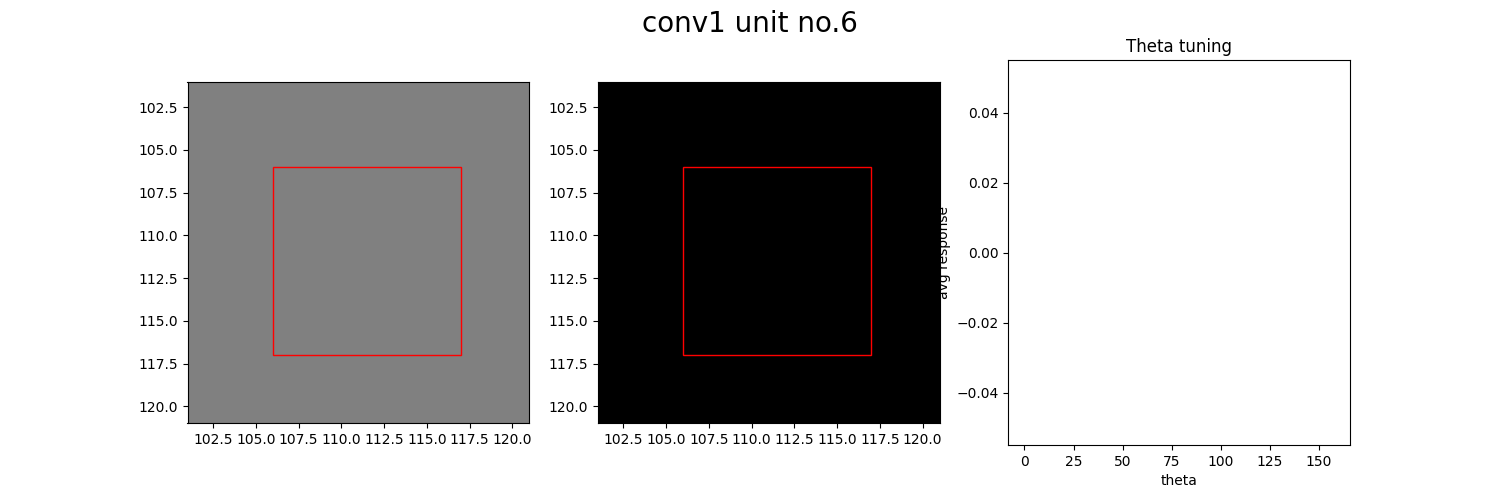

In [2]:
conv_i = 0
unit_i = 6

model = models.alexnet(weights=AlexNet_Weights.IMAGENET1K_V1)
bm = BarRfMapperPz(model, conv_i, (227, 227))
a = bm.animate(unit_i)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f"conv{conv_i+1} unit no.{unit_i}", fontsize=20)
fig.set_size_inches(15, 5)
ax1.clear()
ax2.clear()
im1 = ax1.imshow(np.zeros((227, 227)), cmap='gray', vmin=-1, vmax=1)
im2 = ax2.imshow(np.zeros((227, 227)), cmap='gray')
im3 = ax3.bar(bm.thetas, np.zeros((len(bm.thetas))))
ax3.set_title("Theta tuning")
ax3.set_xlabel("theta")
ax3.set_ylabel("avg response")
    
def animate_func(frame):
    im1.set_data(frame[3])
    ax1.set_title(f"response = {frame[1]:.2f}")

    vmin = im2.get_array().min()
    vmax = im2.get_array().max()
    im2.set_data(frame[0])
    im2.set_clim(vmin=vmin, vmax=vmax)
    ax2.set_title(f"frame {frame[2]}")
    
    ax3.bar(bm.thetas, frame[4], width=0.6)

ani = animation.FuncAnimation(
    fig, animate_func, frames=a, interval=10, save_count=0, cache_frame_data=False, repeat=False)

ax1.add_patch(make_box(bm.box))
ax2.add_patch(make_box(bm.box))
boundary = bm.rf_size//2
ax1.set_xlim([bm.box[1] - boundary, bm.box[3] + boundary])
ax1.set_ylim([bm.box[0] - boundary, bm.box[2] + boundary])
ax2.set_xlim([bm.box[1] - boundary, bm.box[3] + boundary])
ax2.set_ylim([bm.box[0] - boundary, bm.box[2] + boundary])
ax1.invert_yaxis()
ax2.invert_yaxis()
plt.show()